# Evaluation of the model

In [5]:
%matplotlib inline
from tensorflow import keras
import matplotlib.pyplot as plt
import csv
import numpy as np
FOLDER = "data/"

def read_history(path):
    acc = []
    loss = []
    val_acc = []
    val_loss = []

    with open(path) as file:
            csv_reader = csv.reader(file, delimiter=',')
            eliminator = 0
            for row in csv_reader:
                if eliminator!=0:    
                    acc.append(float(row[1]))
                    loss.append(float(row[2]))
                    val_acc.append(float(row[3]))
                    val_loss.append(float(row[4]))
                eliminator = eliminator + 1
    return acc, loss, val_acc, val_loss

## Plot the loss accuracy curves

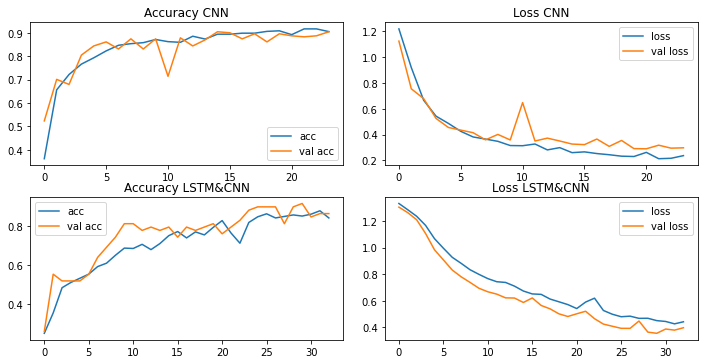

In [7]:
accCNN, lossCNN, val_accCNN, val_lossCNN = read_history("history/historyCNN.csv")
accLSTM, lossLSTM, val_accLSTM, val_lossLSTM = read_history("history/historyLSTM.csv")

fig, axs = plt.subplots(2,2, figsize = (10,5))
fig.tight_layout()

axs[0,0].plot(accCNN, label = "acc")
axs[0,0].plot(val_accCNN, label = "val acc")
axs[0,0].set_title("Accuracy CNN")
axs[0,0].legend()

axs[0,1].plot(lossCNN, label = "loss")
axs[0,1].plot(val_lossCNN, label = "val loss")
axs[0,1].set_title("Loss CNN")
axs[0,1].legend()

axs[1,0].plot(accLSTM, label = "acc")
axs[1,0].plot(val_accLSTM, label = "val acc")
axs[1,0].set_title("Accuracy LSTM&CNN")
axs[1,0].legend()

axs[1,1].plot(lossLSTM, label = "loss")
axs[1,1].plot(val_lossLSTM, label = "val loss")
axs[1,1].set_title("Loss LSTM&CNN")
axs[1,1].legend()
